In [2]:
%pip install statsmodels
# Import necessary libraries
import pandas as pd  # For data manipulation and handling
import statsmodels.formula.api as smf  # For statistical modeling
from datetime import datetime
import numpy as np

#Laden des merged_data.csv
merged_data_csv = "/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv"
df_merged_data = pd.read_csv(merged_data_csv)

df = pd.DataFrame(df_merged_data)

# Fehlende Werte (NaN) durch 0 ersetzen
df_merged_data = df_merged_data.replace(to_replace=r'NaN', value='0', regex=True)
df_merged_data = df_merged_data.replace(to_replace=r'^-$', value='0', regex=True)
df_filled = df_merged_data.fillna(0)
df=df_filled
#Bennenung der Warengruppne für dataframe Namen
warengruppe_namen = {
    1: 'Brot',
    2: 'Broetchen',
    3: 'Crossaint',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}

# Ursprüngliche DataFrames filtern nach Warengruppe
warengruppe_dataframes = {}
for i, name in warengruppe_namen.items():
    var_name = f"df_{name}_W{i}"  # Name erstellen nach: df_Brot_W1
    warengruppe_dataframes[var_name] = df_filled[
        (df_filled['Warengruppe'] == i) &
        (df_filled['Datum'] <= '2018-07-31')
    ]

# Daten bis 2019-07-31 unabhängig der Warengruppe hinzufügen
new_data = df_filled[
    (df_filled['Datum'] > '2018-07-31') &
    (df_filled['Datum'] <= '2019-08-31')
]

for var_name, df in warengruppe_dataframes.items():
    updated_df = pd.concat([df, new_data], ignore_index=True)
    globals()[var_name] = updated_df

data=df_Konditorei_W4
print(data.tail())
# Fit a linear regression model
# - 'Umsatz' is the dependent variable (target) we aim to predict.
# - 'Warengruppe' represents the size of neighboring lots (continuous feature). (Stimmt zwar nicht, aber erstmal so als Beispiel)
# - 'C(Wochentag)' treats the 'Wochentag' feature as a categorical variable.
#Inflationsrate,Heimspiel,Weihnachtsmarkt,Markt,Faehrverkaehr,Kreuzfahrverkehr,Temperatur,Monat,Jahreszeit,Frühling,Sommer,Herbst,Winter,Temp_warm,Temp_cold,Temp_average,Warengruppe,Umsatz,Wochentag,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Schulferien,Semesterferien,Feiertage,Sonnenaufgang,Sonnenuntergang,Tageslaenge,Niederschlag (l/m^2),Sonnenschein (h),Schneehoehe (cm),Sonnenschein (%),Tageslaenge (dezimal)
mod = smf.ols('Umsatz ~ C(Inflationsrate)+Heimspiel+Weihnachtsmarkt+Markt+C(Faehrverkaehr)+C(Kreuzfahrverkehr)+C(Temperatur)+Monat+ Frühling+Sommer+Herbst+Winter+Temp_warm+Temp_cold+Temp_average+ Monday+Tuesday+Wednesday+Thursday+Friday+Saturday+Sunday+Schulferien+Semesterferien+Feiertage+C(Niederschlag)+ C(Schneehoehe)+C(Sonnenschein)', data=df_filled).fit()

# Output the summary of the fitted model
# The summary includes key metrics such as R-squared, coefficients, and p-values.
print(mod.summary())



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
           Datum  Inflationsrate  Heimspiel  Weihnachtsmarkt  Markt  \
2126  2019-07-27             0.0          1                0      0   
2127  2019-07-28             0.0          0                0      0   
2128  2019-07-29             0.0          0                0      0   
2129  2019-07-30             0.0          0                0      0   
2130  2019-07-31             0.0          0                0      0   

     Faehrverkaehr  Kreuzfahrverkehr  Temperatur  Monat Jahreszeit  ...  \
2126             0               0.0     23.5375    7.0     Sommer  ...   
2127             0               0.0     23.3500    7.0     Sommer  ...   
2128             0               0.0     25.2500    7.0     Sommer  ...   
2129             0               0.0     20.7375    7.0     Sommer  ...   
2130             0   

This script builds and evaluates a multiple linear regression model to predict house prices
based on selected features such as lot size of neighboring properties, zip code, and year built.
The dataset is scaled, split into training and testing sets, and visualized using error analysis plots.

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     35.54
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          7.48e-130
Time:                        13:14:41   Log-Likelihood:                -6745.5
No. Observations:                1409   AIC:                         1.354e+04
Df Residuals:                    1383   BIC:                         1.368e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              65.6846     26.090     

/tmp/ipykernel_3881/1145967542.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


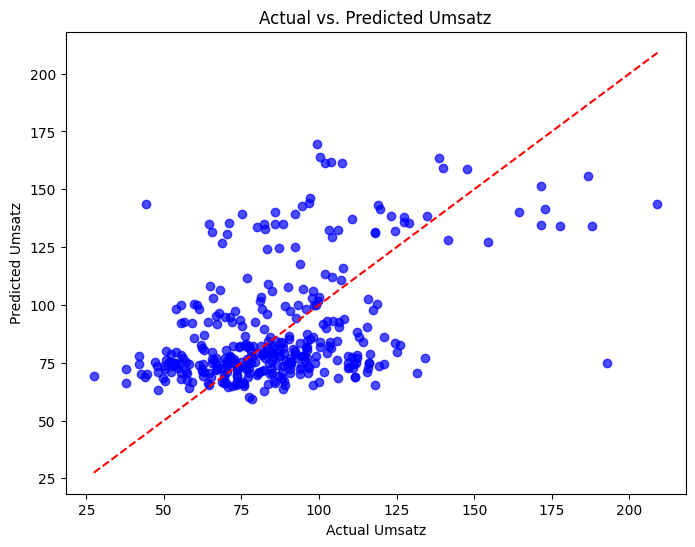

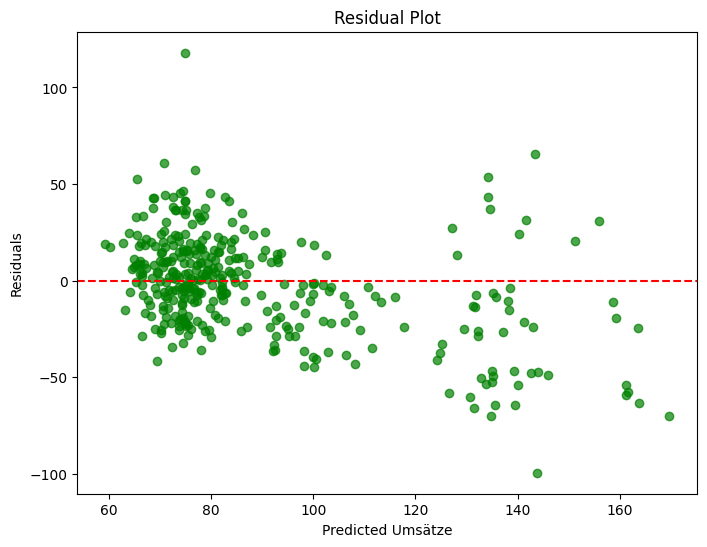

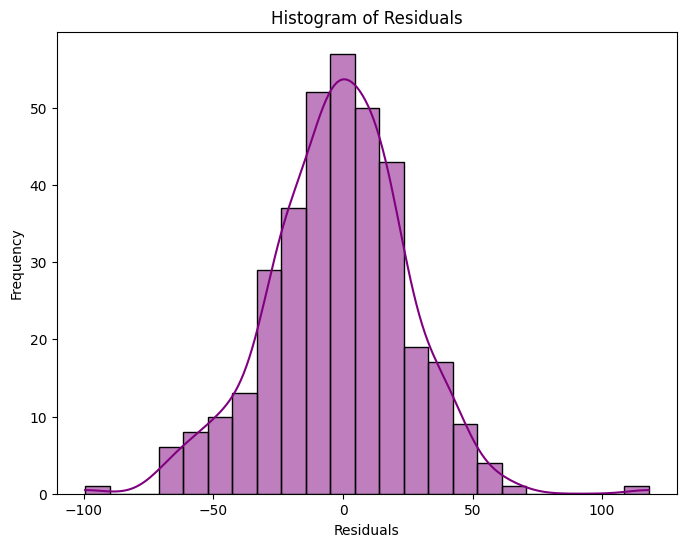

/tmp/ipykernel_3881/1145967542.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")


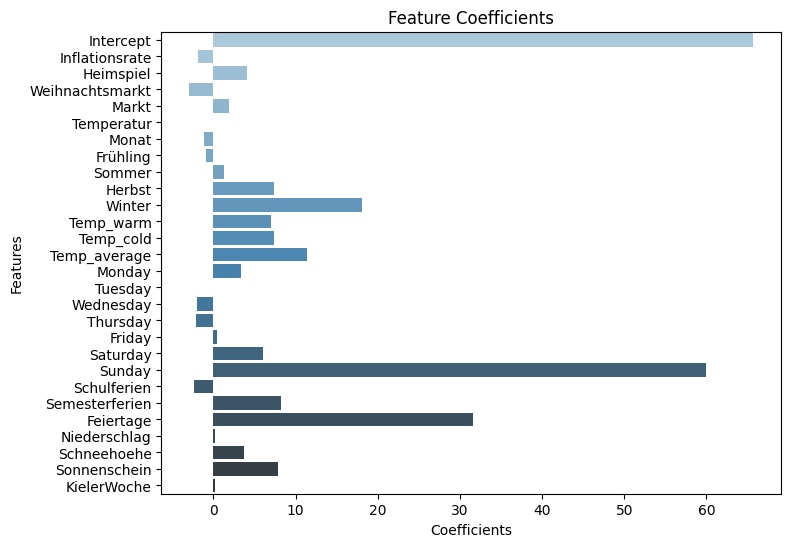

In [8]:
# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations

# Load the dataset 
#data1=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_new.csv")
#Warengruppe=4
#data = data1[data1['Warengruppe'] == Warengruppe]
#print (data.head())
data=data

#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt', 'Faehrverkaehr','Kreuzfahrverkehr','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Schulferien','Semesterferien','Feiertage','Niederschlag', 'Schneehoehe','Sonnenschein','KielerWoche']
X = data[features] #target variable: Umsatz
y=data['Umsatz']

# Scale the feature data to standardize the range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']
#X_test = test_data[features] #erstmal so, da die gewünschten daten, keine Daten für test Daten übrig lassen
#y_test = test_data['Umsatz']




# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(X_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)  # Add constant to test set for predictions
predictions = model.predict(X_test.astype(float))
print("Predictions for test data:", predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_test - predictions) / y_test).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Scatter plot: Actual vs. Predicted Umsatz
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("Actual vs. Predicted Umsatz")
plt.show()

# Calculate residuals (differences between actual and predicted Umsätze)
residuals = y_test - predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

This script uses a Stochastic Gradient Descent (SGD) regressor to predict house prices
based on selected features such as lot size, number of bedrooms, and number of bathrooms.
The dataset is split into training and testing sets, and the model is evaluated using various
error metrics and visualizations.

Predictions for test data: [54.29314535 51.69360787 48.51958361 56.2106505  61.54269451]
Mean Absolute Error (MAE): 23.20
Mean Squared Error (MSE): 863.01
Mean Absolute Percentage Error (MAPE): 26.39%


/tmp/ipykernel_3881/3170813754.py:67: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


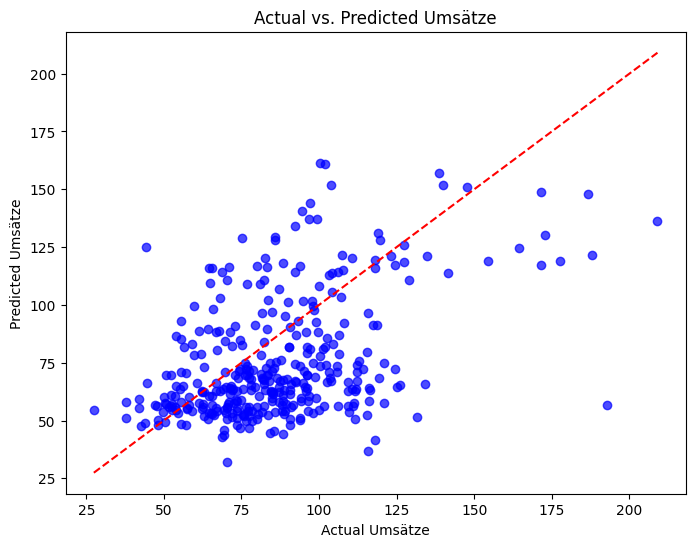

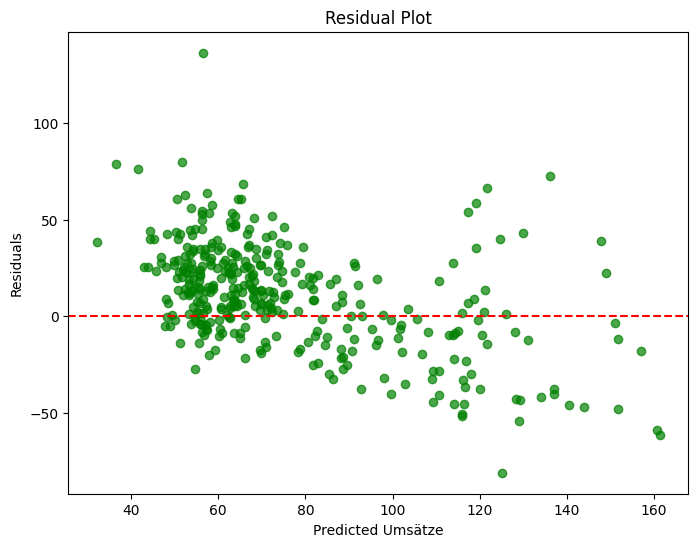

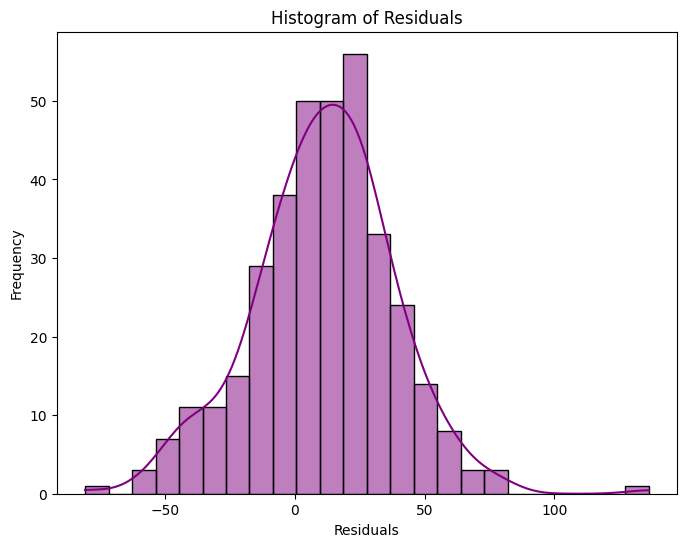

/tmp/ipykernel_3881/3170813754.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")


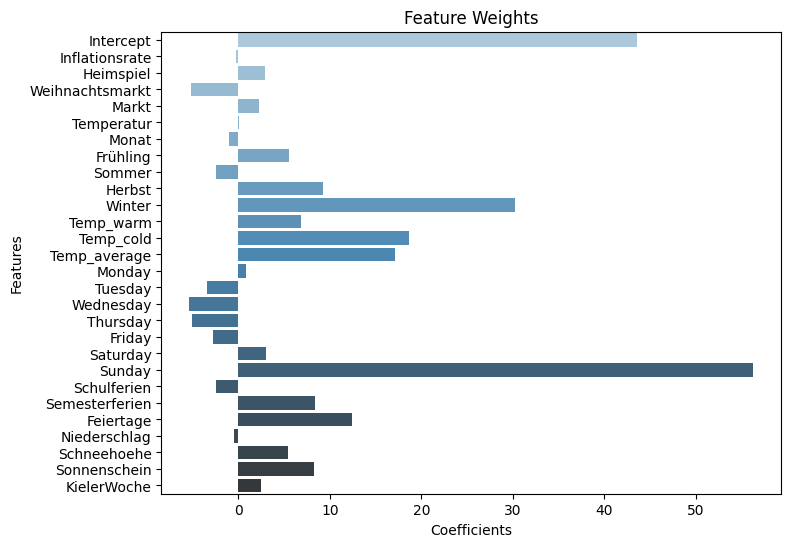

In [4]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
data=data
# Load the dataset 
#data1=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_new.csv")
#Warengruppe=4
#data = data1[data1['Warengruppe'] == Warengruppe]
#print (data.head())

#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt', 'Faehrverkaehr','Kreuzfahrverkehr','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'

# Select features and target variable
# Features include 'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Schulferien','Semesterferien','Feiertage', 'Schneehoehe','Sonnenschein','KielerWoche'
#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Schulferien','Semesterferien','Feiertage','Niederschlag', 'Schneehoehe','Sonnenschein','KielerWoche'
features = ['Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Schulferien','Semesterferien','Feiertage','Niederschlag', 'Schneehoehe','Sonnenschein','KielerWoche']
X = data[features] #target variable: Umsatz
y=data['Umsatz']

# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[data['Datum'] > validation_end_date]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_test=X_validation = validation_data[features]
y_test=y_validation = validation_data['Umsatz']
#X_test = test_data[features] #erstmal so, da die gewünschten daten, keine Daten für test Daten übrig lassen
#y_test = test_data['Umsatz']

# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

# Calculate error metrics
mae = mean_absolute_error(y_test, sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, sgd_predictions)  # Mean Squared Error
mape = (abs((y_test - sgd_predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sgd_predictions, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Umsätze")
plt.ylabel("Predicted Umsätze")
plt.title("Actual vs. Predicted Umsätze")
plt.show()

# Calculate residuals (differences between actual and predicted values)
residuals = y_test - sgd_predictions

# Residual plot: Predicted Umsätze vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(sgd_predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Umsätze")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Extract and display model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': [sgd_model.intercept_[0]] + list(sgd_model.coef_)
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="Blues_d")
plt.title("Feature Weights")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()


This script demonstrates the use of Ridge Regression, a regularized linear regression technique,
to predict house prices. Hyperparameter tuning is performed using GridSearchCV to optimize the
regularization parameter (alpha) for minimizing the Mean Absolute Error (MAE).

In [5]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics

# Load the dataset 
#data1=pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/merged_data_new.csv")
#Warengruppe=4
#data = data1[data1['Warengruppe'] == Warengruppe]
#print (data.head())
data=data
#'Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt', 'Faehrverkaehr','Kreuzfahrverkehr','Temperatur','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'

# Select features and target variable
# Features include the different Warengruppen, Monday y/n
features = ['Inflationsrate','Heimspiel','Weihnachtsmarkt', 'Markt','Monat' ,'Frühling','Sommer','Herbst','Winter','Temp_warm','Temp_cold','Temp_average', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Schulferien','Semesterferien','Feiertage', 'Schneehoehe','Sonnenschein','KielerWoche']
X = data[features] #target variable: Umsatz
y=data['Umsatz']
# Define your date thresholds
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'
test_end_date='2019-07-30'

# Convert to datetime if not already
data['Datum'] = pd.to_datetime(data['Datum'])
# Split the data based on the date thresholds
train_data = data[data['Datum'] <= train_end_date]
validation_data = data[(data['Datum'] > train_end_date) & (data['Datum'] <= validation_end_date)]
test_data = data[(data['Datum'] > validation_end_date) & (data['Datum'] <= test_end_date)]

X_train = train_data[features]
y_train = train_data['Umsatz']
X_validation = validation_data[features]
y_validation = validation_data['Umsatz']
X_test = test_data[features] 
y_test = test_data['Umsatz']

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
# - cv=5: 5-fold cross-validation
# - scoring='neg_mean_absolute_error': Metric for selecting the best model (negative MAE)
# - verbose=1: Display progress during grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
mape = (abs((y_test - predictions) / y_test).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(predictions)
#sample=pd.read_csv('sample_submission.csv')
#sample['Umsatz']=sample['Umsatz'].replace(predictions.iloc[:,0])

#sample.to_csv=('predictions.csv',index==False)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'alpha': 10}
Mean Absolute Error (MAE): 88.77
Mean Squared Error (MSE): 7977.66
Mean Absolute Percentage Error (MAPE): inf%
[ 82.30308232  83.88360203  84.02595492  81.5941316   84.99807621
  88.43126502  84.11610291  81.12642875  81.53848659  85.1956302
  81.89774033  87.43464538  83.2517991   85.35441975  84.86724946
  82.25748419  85.675438    87.03055114  86.13592424  86.81735535
  89.9316399   86.20524405  87.69969947  87.45031047  82.58032168
  89.82635444  86.16558796  87.537406    89.05218611  81.58199787
  89.31316565  90.93067125  91.00084566  92.50766358  90.63740622
  90.43498193  90.31935295  87.04646296  99.37337794  99.52416329
  87.4865461   90.85076267  90.89846828  90.38869631  93.31040106
  99.44691128 100.53129223 102.16385407 103.08642266 101.47572096
  99.2523903   91.55402186  97.60843887  91.76538888  95.65885444
  95.17246061  91.78150227  87.00962338 100.50251021  95.03775008
  

In [6]:
#Datum zu predicted Umsatzdaten hinzufügen
import numpy as np

# Startdatum von test_data angeben
startdatum = np.datetime64('2018-08-01')

# Erstelle ein Array von Datumsangaben entsprechend der Länge der Umsatzdaten
datum_array = np.arange(startdatum, startdatum + len(predictions))

# Konvertiere das Datumsarray zu Strings
datum_array_str = datum_array.astype(str)

# Integriere Datum und Umsatzdaten in ein gemeinsames Array
date_prediction = np.column_stack((datum_array_str, predictions))

#print(date_prediction)

# Konvertiere das Array zu einem Pandas DataFrame
df_predictions = pd.DataFrame(date_prediction, columns=["Datum", "Umsatz"])


# Optional: Umsatzdaten zurück zu numerischen Typen konvertieren
df_predictions["Umsatz"] = pd.to_numeric(df_predictions["Umsatz"])

#Hi Wiebke, um das Problem schnell zu lösen, ersetzte ich die Werte jetzt mit Nullen. Kannst du gerne wieder löschen, wenn du das Problem gelöst hast :)
df_predictions = df_predictions.fillna(0)


print(df_predictions)

          Datum     Umsatz
0    2018-08-01  82.303082
1    2018-08-02  83.883602
2    2018-08-03  84.025955
3    2018-08-04  81.594132
4    2018-08-05  84.998076
..          ...        ...
359  2019-07-26  79.735236
360  2019-07-27  82.855399
361  2019-07-28  84.514196
362  2019-07-29  79.735236
363  2019-07-30  84.514196

[364 rows x 2 columns]


In [7]:
#Mergen der Umsatzdaten mit test_csv

# CSV-Datei mit Warengruppe 1 einlesen
df_test_csv = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/test.csv")

# Filtern der Zeilen für Warengruppe 1
warengruppe4_df = df_test_csv[df_test_csv["Warengruppe"] == 4].copy() #Bitte Warengruppenummer ändern!

# Merge der DataFrames mit Left Join auf die Spalte 'Datum'
W_df_merged = pd.merge(warengruppe4_df, df_predictions, on="Datum", how="left")

# Ergebnis als neue CSV-Datei speichern
W_df_merged.to_csv("/workspaces/DS_ML_Gr_1.5/2_BaselineModel/W4_Konditorei_ID.csv", index=False)

# Ergebnis anzeigen
print(W_df_merged)

          id       Datum  Warengruppe     Umsatz
0    1808014  2018-08-01            4  82.303082
1    1808024  2018-08-02            4  83.883602
2    1808034  2018-08-03            4  84.025955
3    1808044  2018-08-04            4  81.594132
4    1808054  2018-08-05            4  84.998076
..       ...         ...          ...        ...
349  1907264  2019-07-26            4  79.735236
350  1907274  2019-07-27            4  82.855399
351  1907284  2019-07-28            4  84.514196
352  1907294  2019-07-29            4  79.735236
353  1907304  2019-07-30            4  84.514196

[354 rows x 4 columns]
